In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel(r'\Users\HP\Downloads\Flight_Fare_Prediction_DataSet.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [5]:
#null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# row containing Null value
df[df["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
# row containing Null value
df[df["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
# drop all rows with any NaN and NaT values
df = df.dropna()

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
#making copy of dataframe 
df_copy = df

In [11]:
df_copy.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [12]:
df_copy.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
df_copy.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
# we can see date_of_journey,dep_time,arrival_time are in object format while they should be in datetime format -- 
#  change to datetime format.

df_copy['Date_of_Journey'] = pd.to_datetime(df_copy['Date_of_Journey'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specif

In [15]:
df_copy['Dep_Time'] = pd.to_datetime(df_copy['Dep_Time'])

In [16]:
df_copy['Arrival_Time'] = pd.to_datetime(df_copy['Arrival_Time'])

In [17]:
df_copy.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
df_copy.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-12-10 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-10 05:50:00,2022-12-10 13:15:00,7h 25m,2 stops,No info,7662


In [19]:
#Now Date_Of_journey is in YYYY-MM-DD format so we will extract date month and year from it.....dt is a DataFrame object.
df_copy['Date_of_Journey_year']= df_copy['Date_of_Journey'].dt.year
df_copy['Date_of_Journey_month']= df_copy['Date_of_Journey'].dt.month
df_copy['Date_of_Journey_day']= df_copy['Date_of_Journey'].dt.day

In [20]:
df_copy.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-12-10 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-10 05:50:00,2022-12-10 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-10 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6


In [21]:
#As we have extracted the year month and date from the date_of_journey so we can drop this coloumn
df_copy.drop("Date_of_Journey",axis= 1,inplace=True)

In [22]:
df_copy.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-12-10 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-10 05:50:00,2022-12-10 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5


In [24]:
#extracting the hour and minutes from the dep_time and arrival_time 
df_copy['Dep_Time_hour']= df_copy['Dep_Time'].dt.hour
df_copy['Dep_Time_minute']= df_copy['Dep_Time'].dt.minute
df_copy['Arrival_Time_hour']= df_copy['Dep_Time'].dt.hour
df_copy['Arrival_Time_minute']= df_copy['Dep_Time'].dt.minute

In [25]:
df_copy.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-12-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-05 05:50:00,2022-12-05 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50,5,50


In [26]:
#Analyse when most of the flights take off like Evening,Morning etc.
def flight_dep_time(x):
    if (x>4) & (x<=8):
        return 'Early morning'
    elif (x>8) & (x<=12):
        return 'Morning'
    elif (x>12) & (x<=16):
        return 'Afternoon'
    elif (x>16) & (x<=20):
        return 'Evening'
    else:
        return 'Night'

<AxesSubplot:>

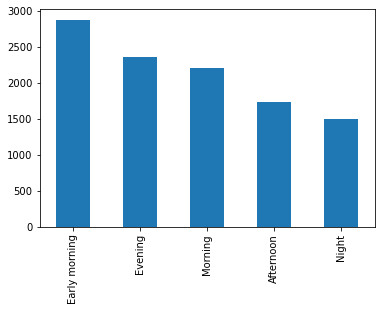

In [27]:
df_copy["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar")

In [28]:
#In above bar graph on hovering bars values are not reflecting so to make it interactive we use plotly and cufflinks to make__
#__graph interactive.



In [29]:
#!pip install cufflinks -->installing cufflinks module

In [30]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
#iplot is i python plot makes dyanamic and interactive charts.
#plotlyjs is a javascript class which makes the plot more user friendly.
#init_notebook_mode will end making plot in this ipython notebook.

In [31]:
cf.go_offline()

In [32]:
df_copy["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind="bar",color='Green')

In [33]:
#Duration feature contains hour and minute but machine can't read or understand so we need to separate hour and minute
df_copy.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-12-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-05 05:50:00,2022-12-05 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-05 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6,9,25,9,25


In [34]:
#As we can see in Duration feature in some rows only hours is there no minute so before separating hour and minute we need to preprocess it
def func_duration(x):
    if 'h' not in x:
        return '0h ' +x
    elif 'm' not in x:
        return x+ ' 0m'
    else:
        return x

In [35]:
df_copy['Duration']= df_copy['Duration'].apply(func_duration)

In [36]:
df_copy['Duration'].head(4)

0    2h 50m
1    7h 25m
2    19h 0m
3    5h 25m
Name: Duration, dtype: object

In [37]:
df_copy["Duration_Hours"]=df_copy["Duration"].apply(lambda x:x.split(' ')[0][0:-1])
 #hour and minute got separated in a list

In [38]:
df_copy["Duration_Mins"]=df_copy["Duration"].apply(lambda x:x.split(' ')[1][0:-1])

In [39]:
df_copy.head(2)
#copy_df.dtypes

#Atlast Duration_Hours and Duraytion_Mins got added.


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-12-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-05 05:50:00,2022-12-05 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50,5,50,7,25


### Analysing whether Duration impacts the price or not

In [40]:
#Now convert the duration hour into minutes 
df_copy["Duration_minute"]= df_copy["Duration"].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [41]:
df_copy["Duration_minute"].head(4)

0     170
1     445
2    1140
3     325
Name: Duration_minute, dtype: int64

In [42]:
#Now TotalDuration and Price are in numerical nature therefore by scatter plot we can determine whether duration impact price.!!
import matplotlib.pyplot as plt

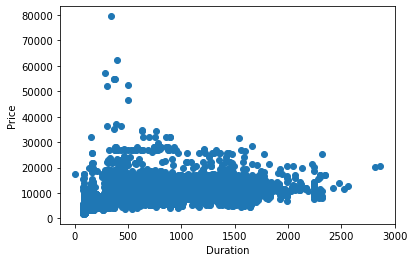

In [43]:
plt.scatter(df_copy["Duration_minute"],df_copy["Price"])
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

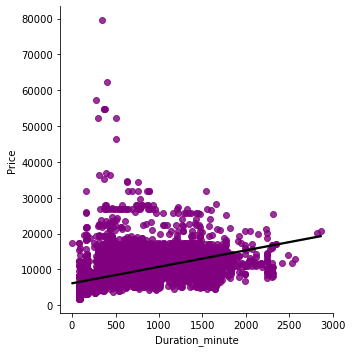

In [44]:
#use lnplot in which we can see regression line below scatter plot
import seaborn as sns
sns.lmplot(x="Duration_minute",y="Price",data=df_copy,line_kws={'color': 'black'},scatter_kws={'color': 'purple'})

In [45]:
#From above plot We can see  price is increasing as duration increases...

In [46]:
#City with maximum no. of Destination flights
df_copy["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [47]:
#Here we have problem with a city name with different notations- new delhi & Delhi so..
df_copy["Destination"]=df_copy["Destination"].replace("New Delhi","Delhi")

In [48]:
#cohin has max. no. of Destination flights
df_copy["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:ylabel='Destination'>

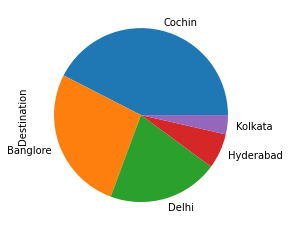

In [49]:
df_copy["Destination"].value_counts().plot(kind='pie')

In [50]:
df_copy.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins,Duration_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,2022-12-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-05 05:50:00,2022-12-05 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50,5,50,7,25,445


### Additional_info,Route,Duration_minute,Date_of_Journey_year these features are no use for ML.

In [51]:
df_copy.drop(columns=['Route','Additional_Info','Duration_minute','Date_of_Journey_year'],axis=1,inplace=True)

In [52]:
df_copy.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,Delhi,2022-12-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,3,24,22,20,22,20,2,50
1,Air India,Kolkata,Banglore,2022-12-05 05:50:00,2022-12-05 13:15:00,7h 25m,2 stops,7662,1,5,5,50,5,50,7,25


In [53]:
### Extracting categorical and numerical features
cat_col=[ col for col in df_copy.columns if df_copy[col].dtype=='object']
cat_col

['Airline',
 'Source',
 'Destination',
 'Duration',
 'Total_Stops',
 'Duration_Hours',
 'Duration_Mins']

In [54]:
num_col=[col for col in df_copy.columns if df_copy[col].dtype=='int64']
num_col

['Price',
 'Date_of_Journey_month',
 'Date_of_Journey_day',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute']

## Applying one hot encoding 

In [55]:
#Since Machine can't understand names like what is Delhi,bangalore... etc we will encode 

df_copy["Source"].apply(lambda x: 1 if x=='Banglore' else 0)
#All the values are made to one where Source is Banglore

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [56]:
for category in df_copy["Source"].unique():
    df_copy["Source_"+category]=df_copy["Source"].apply(lambda x: 1 if x==category else 0)

In [57]:
df_copy.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,Delhi,2022-12-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,3,24,...,20,22,20,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,2022-12-05 05:50:00,2022-12-05 13:15:00,7h 25m,2 stops,7662,1,5,...,50,5,50,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2022-12-05 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,13882,9,6,...,25,9,25,19,0,0,0,1,0,0


In [58]:
#Imp Note--> Above encoding done from scratch and generally company asks about it.
#From scikit module we can also do it

In [59]:
#Similarly destination encoding is done
for category in df_copy["Destination"].unique():
    df_copy["Destination_"+category]=df_copy["Destination"].apply(lambda x: 1 if x==category else 0)

In [60]:
df_copy.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Hyderabad
0,IndiGo,Banglore,Delhi,2022-12-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,3,24,...,1,0,0,0,0,1,0,0,0,0
1,Air India,Kolkata,Banglore,2022-12-05 05:50:00,2022-12-05 13:15:00,7h 25m,2 stops,7662,1,5,...,0,1,0,0,0,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2022-12-05 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,13882,9,6,...,0,0,1,0,0,0,0,1,0,0


#### problem of one hot encoding is suppose we have 1000 cities the data set then 999 features will be generated    which creates complexity to learn to machine this is known as 'curse of  Dimensionality' therefore to overcome this problem we can use Target Guided Encoding

##### Calculate Average price of flight for each city and rank accordingly.Suppose Delhi Avg. Price is 15k Mumbai is 18k then Delhi is 2 and Mumbai's rank is 1

### Target guided encoding

In [61]:
#Create Dictionary in which key is city and its value is priority(rank which is calculated by Avg. Price)
np.round(df_copy.groupby(['Airline'])['Price'].mean(),2)
#Average price of all arilines is calculated

Airline
Air Asia                              5590.26
Air India                             9612.43
GoAir                                 5861.06
IndiGo                                5673.68
Jet Airways                          11643.92
Jet Airways Business                 58358.67
Multiple carriers                    10902.68
Multiple carriers Premium economy    11418.85
SpiceJet                              4338.28
Trujet                                4140.00
Vistara                               7796.35
Vistara Premium economy               8962.33
Name: Price, dtype: float64

In [62]:
df_copy.groupby(['Airline']).size().sort_values(ascending=False)

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
dtype: int64

In [63]:
airlines=df_copy.groupby(['Airline'])['Price'].mean().sort_values().index 
airlines
# index creates a list datastructure

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [64]:
#Now we will convert airlines in dictionary.Ex-->Key is Trujet its values is 0,Spicejet key is 1 and value is 1 so on so forth.
dict1={key:index for index,key in enumerate(airlines,0)}
dict1
#Code for Dictionary Comprehension

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [65]:
for index,key in enumerate(airlines,0):
    print(index,key)

0 Trujet
1 SpiceJet
2 Air Asia
3 IndiGo
4 GoAir
5 Vistara
6 Vistara Premium economy
7 Air India
8 Multiple carriers
9 Multiple carriers Premium economy
10 Jet Airways
11 Jet Airways Business


In [66]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

#### Now we will map our dictionary to Airline feature

In [67]:
df_copy["Airline"]=df_copy["Airline"].map(dict1)

In [68]:
df_copy["Airline"]
#DataType of Airline has changes from object to int

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [69]:
  df_copy.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Hyderabad
0,3,Banglore,Delhi,2022-12-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,3,24,...,1,0,0,0,0,1,0,0,0,0
1,7,Kolkata,Banglore,2022-12-05 05:50:00,2022-12-05 13:15:00,7h 25m,2 stops,7662,1,5,...,0,1,0,0,0,0,1,0,0,0
2,10,Delhi,Cochin,2022-12-05 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,13882,9,6,...,0,0,1,0,0,0,0,1,0,0


#### Encoding Destination Feature

In [70]:
Destination=np.round(df_copy.groupby(["Destination"])["Price"].mean(),2).sort_values().index
# Creating a list DataStructure

In [71]:
dict2={key:index  for index,key in enumerate(Destination,0)}
#dict1={key:index for index,key in enumerate(airlines,0)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [72]:
df_copy["Destination"]=df_copy["Destination"].map(dict2)

In [73]:
df_copy.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Hyderabad
0,3,Banglore,2,2022-12-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,3,24,...,1,0,0,0,0,1,0,0,0,0
1,7,Kolkata,3,2022-12-05 05:50:00,2022-12-05 13:15:00,7h 25m,2 stops,7662,1,5,...,0,1,0,0,0,0,1,0,0,0
2,10,Delhi,4,2022-12-05 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,13882,9,6,...,0,0,1,0,0,0,0,1,0,0


In [74]:
#Encoding total stops feature
df_copy["Total_Stops"]=df_copy["Total_Stops"].replace('non-stop',0).replace('2 stops',2).replace('1 stop',1).replace('3 stops',3).replace('4 stops',4)

### Performing Outlier Detection

### Outliers can be detected by
    1.Distribution
    2.Histogram
    3.Boxplot

In [75]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1) #subplot(3,1) means 3 rows in which each plot will be plotted and 1 column 
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False) 
    #kde parameter is Kernel Distribution Estimator if made false in distplot then it automatically makes histogrom

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



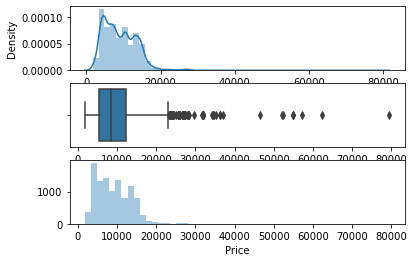

In [76]:
plot(df_copy,'Price')

#### From above plots we can see Outliers therefore where Price>35000 we will replace it with median value of price
#### Note:- We dont replace with mean because mean gets highly affected by outliers

In [77]:
##np.where function(condition,if true,if false)
df_copy["Price"]=np.where(df_copy["Price"]>35000,df_copy["Price"].median(),df_copy["Price"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



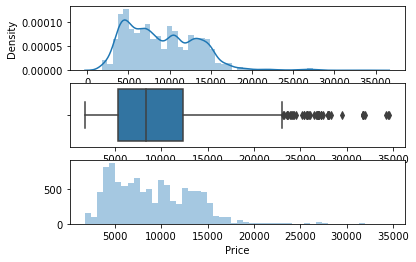

In [78]:
plot(df_copy,'Price')

### Performing feature selection

In [79]:
df_copy.drop(columns=["Source","Duration","Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [80]:
df_copy.head(3)

,Airline,Destination,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Hyderabad
0,3,2,0,3897.0,3,24,22,20,22,20,...,1,0,0,0,0,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,5,50,...,0,1,0,0,0,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,9,25,...,0,0,1,0,0,0,0,1,0,0


In [81]:
df_copy.dtypes

Airline                    int64
Destination                int64
Total_Stops                int64
Price                    float64
Date_of_Journey_month      int64
Date_of_Journey_day        int64
Dep_Time_hour              int64
Dep_Time_minute            int64
Arrival_Time_hour          int64
Arrival_Time_minute        int64
Duration_Hours            object
Duration_Mins             object
Source_Banglore            int64
Source_Kolkata             int64
Source_Delhi               int64
Source_Chennai             int64
Source_Mumbai              int64
Destination_Delhi          int64
Destination_Banglore       int64
Destination_Cochin         int64
Destination_Kolkata        int64
Destination_Hyderabad      int64
dtype: object

In [82]:
df_copy["Price"]=df_copy["Price"].astype(int)

In [83]:
df_copy.dtypes

Airline                   int64
Destination               int64
Total_Stops               int64
Price                     int32
Date_of_Journey_month     int64
Date_of_Journey_day       int64
Dep_Time_hour             int64
Dep_Time_minute           int64
Arrival_Time_hour         int64
Arrival_Time_minute       int64
Duration_Hours           object
Duration_Mins            object
Source_Banglore           int64
Source_Kolkata            int64
Source_Delhi              int64
Source_Chennai            int64
Source_Mumbai             int64
Destination_Delhi         int64
Destination_Banglore      int64
Destination_Cochin        int64
Destination_Kolkata       int64
Destination_Hyderabad     int64
dtype: object

In [84]:
#As we can see only Duration_hours & Duration_mins are of object while rest others are int64, we need to conver both of them...
#......into int

In [85]:
def change_into_int(x):
    df_copy[x]=pd.to_numeric(df_copy[x])
for feature in ['Duration_Hours','Duration_Mins']:
    change_into_int(feature)


In [86]:
df_copy.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                    int32
Date_of_Journey_month    int64
Date_of_Journey_day      int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_Hours           int64
Duration_Mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
Destination_Delhi        int64
Destination_Banglore     int64
Destination_Cochin       int64
Destination_Kolkata      int64
Destination_Hyderabad    int64
dtype: object

### Estimating which feature has the highest impact on target that is- 'Price'
##### There are many ways for selecting 
##### KBest
##### Score --> i)f-regression(interally works like correlation) (ii)mutual_info_regression

In [88]:
from sklearn.feature_selection import mutual_info_regression

In [90]:
#Drop the Price (Target variable ) from dataframe
x=df_copy.drop(['Price'],axis=1)

In [92]:
y=df_copy['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int32

In [94]:
x.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Date_of_Journey_month    int64
Date_of_Journey_day      int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_Hours           int64
Duration_Mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
Destination_Delhi        int64
Destination_Banglore     int64
Destination_Cochin       int64
Destination_Kolkata      int64
Destination_Hyderabad    int64
dtype: object

In [97]:
x.head(3)

,Airline,Destination,Total_Stops,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Destination_Delhi,Destination_Banglore,Destination_Cochin,Destination_Kolkata,Destination_Hyderabad
0,3,2,0,3,24,22,20,22,20,2,...,1,0,0,0,0,1,0,0,0,0
1,7,3,2,1,5,5,50,5,50,7,...,0,1,0,0,0,0,1,0,0,0
2,10,4,2,9,6,9,25,9,25,19,...,0,0,1,0,0,0,0,1,0,0


In [98]:
a=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)
a.columns=(["Importance"])

In [99]:
a.sort_values(by="Importance",ascending=False)

,Importance
Destination,0.997501
Airline,0.971212
Total_Stops,0.794784
Source_Delhi,0.523487
Destination_Cochin,0.517461
Duration_Hours,0.465837
Destination_Banglore,0.455664
Source_Kolkata,0.451797
Source_Banglore,0.382353
Destination_Delhi,0.379566


###  From above we can see Destination feature has the highest effect on Price

### Building ML model

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)
from sklearn.ensemble import RandomForestRegressor

In [102]:
ml_model=RandomForestRegressor()

In [107]:
model=ml_model.fit(x_train,y_train)

In [108]:
y_pred=ml_model.predict(x_test)

In [109]:
y_pred.shape

(2137,)

In [110]:
y_test.shape

(2137,)

In [111]:
ml_model.score(x_test,y_test) 

0.7953173084873403

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
from sklearn.neighbors import KNeighborsRegressor

In [114]:
knr=KNeighborsRegressor()

In [115]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [116]:
from sklearn import metrics

In [117]:
y_pred=knr.predict(x_test)

In [118]:
r2=metrics.r2_score(y_test,y_pred)
r2

0.6178973443066995

In [119]:
lnr=LinearRegression()

In [120]:
!pip install pickle

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


### Evaluation Metric
#### There are 4 evaluation metric for Regression model.
#### 1.R2 Score
#### 2.MSE
#### 3.MAE
#### 4.MAPE
#### 5.RMSE
#### We are using MAPE(Mean Absolute Percentage Error)
#### Creating Function for calculating MAPE from scratch as there are no inbuilt function.

In [121]:
#in MAPE E is error which is "what is the predicted value and what is the actual value".

In [122]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs(y_true-y_pred)/y_true)*100

In [124]:
mape(y_test,y_pred)
#it means there is only 20.30% error in the above built model.

20.300239912656235

### Automated ML pipeline

In [138]:
def predict(ml_model):
    model=ml_model.fit(x_train,y_train)
    print('Training Score {}'.format(model.score(x_train,y_train)))
    print("Actual Score{}".format(model.score(x_test,y_test)))
    y_prediction=model.predict(x_test)
    print("Predictions are {}".format(y_prediction))
    print("\n")
    #Now we will calculate each evaluation metric
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print("R2 Score is {}".format(r2_score))
    print("MSE {}".format(metrics.mean_squared_error(y_test,y_prediction)))
    print("MAE {}".format(metrics.mean_absolute_error(y_test,y_prediction)))
    print("RMSE {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print("MAPE {}".format(mape(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

Training Score 0.5791180088365337
Actual Score0.5491463636480078
Predictions are [12629.703125   8913.6015625  8919.2109375 ...  6466.8984375 10611.171875
 11850.4609375]


R2 Score is 0.5491463636480078
MSE 9078070.169632237
MAE 2087.357068173842
RMSE 3012.9835992969224
MAPE 24.876335001081706


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



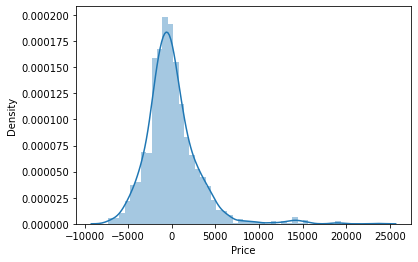

In [139]:
predict(LinearRegression())

Training Score 0.950978685274527
Actual Score0.7998329022198504
Predictions are [16613.46        6332.38        8747.68       ...  6559.85
 12662.734      13299.96383333]


R2 Score is 0.7998329022198504
MSE 4030423.2078571008
MAE 1231.4075598641336
RMSE 2007.591394646107
MAPE 13.591543853618457


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



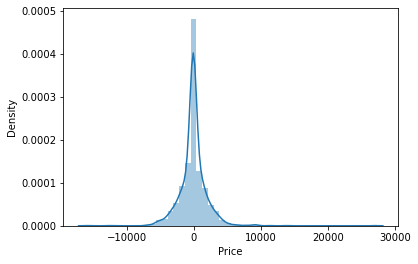

In [140]:
predict(RandomForestRegressor())

### Hyperparameter Optimization
#### 1.RandomSearchCV-->It is fast because it picks possible values of a parameter in a random way.
#### 2.GridSearch-->little bit slower because it uses P&C to find optimal value.
#### 3.Smote

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
reg_rf=RandomForestRegressor()
#Shift+tab will give what are the parameters for it and accordingly will find the optimal values of it.
#ref_rf initializing the object of the RandomForestRegressor() class.

In [127]:
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,20]
#np.linspace gives a list with equally divided values.

#### Above all are the parameters and we are giving range of values to find optimal values.

In [128]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split    
}

In [129]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 20]}

In [130]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
#cv is cross validate=3 which means 3 fold.Determines the cross-validation splitting strategy.
#verbose typically responsible to showcase how your code is running.
#n_jobs-->Number of jobs to run in parallel.

In [131]:
rf_Random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [132]:
rf_Random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [133]:
pred2=rf_Random.predict(x_test)

In [134]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8222941801679774